In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


%matplotlib inline


# sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("deep")
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
rc("savefig", dpi=300)
rc("figure", dpi=192)
rc('lines', linewidth=2)

plt.rcParams['figure.figsize'] = 6, 4


pd.options.display.max_columns = 999
pd.options.display.max_rows = 400


from datetime import datetime
str(datetime.now())

import h5py

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
L = pd.read_excel('../../measurements/Chapra and Dolan paper/Lake_Erie_TP_Basin_Loads.xlsx')

In [3]:
Precip_mm = pd.read_excel('../../measurements/glerl/Precip_Basin.xlsx', sheetname='ERI_mm', skiprows=3)

In [4]:
TP_a = pd.read_excel('../GLENDA/LE_BasinAv_April_GLNPO.xlsx')
TP = pd.read_excel('../GLENDA/LE_BasinAv_GLNPO.xlsx')

In [5]:
def vollenweider_model(tau, z_av, V, Q, a, L):
    sigma = a/z_av

    Q = Q*60*60*24*365 #m3 yr-1
    TP_load = L*1e3*1e3*1e3 # MTA -> mg

    TP_in = TP_load/Q #mg m-3

    TP = TP_in/(1+sigma*tau)
    NS = sigma * V *TP
#     print("%.1f & %.1f & %.1f," % (NS*1e-9, L - NS*1e-9, TP))
    return NS*1e-9, L - NS*1e-9, TP

In [6]:
Precip_scale_F = (Precip_mm[-21:-6].Total/Precip_mm[-21:-6].Total.mean()).values

### Western Basin

In [7]:
S_WB, E_WB, TP_WB, S_WB_min, E_WB_min, TP_WB_min, S_WB_max, E_WB_max, TP_WB_max = [np.zeros((15)) for i in range(9)]
S_WB_sigma_min, E_WB_sigma_min, TP_WB_sigma_min, S_WB_sigma_max, E_WB_sigma_max, TP_WB_sigma_max = [np.zeros((15)) for i in range(6)]
tau=0.1;z_av=7.4; V=20e+9; Q=5787; a=30; Load=L.WB
for i,y in enumerate(L.Year):
    S_WB[i], E_WB[i], TP_WB[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=30, L=Load[i])
    S_WB_min[i], E_WB_min[i], TP_WB_min[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=30, L=Load[i]*0.75)
    S_WB_max[i], E_WB_max[i], TP_WB_max[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=30, L=Load[i]*1.25)
    S_WB_sigma_max[i], E_WB_sigma_max[i], TP_WB_sigma_max[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=8, L=Load[i])
    S_WB_sigma_min[i], E_WB_sigma_min[i], TP_WB_sigma_min[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=50, L=Load[i])

### Central Basin

In [8]:
tau=1.4; z_av=18.3; V=290e+9; Q=6357; a=30; Load=L.CB+E_WB

S_CB, E_CB, TP_CB, S_CB_min, E_CB_min, TP_CB_min, S_CB_max, E_CB_max, TP_CB_max = [np.zeros((15)) for i in range(9)]
S_CB_sigma_min, E_CB_sigma_min, TP_CB_sigma_min, S_CB_sigma_max, E_CB_sigma_max, TP_CB_sigma_max = [np.zeros((15)) for i in range(6)]
for i,y in enumerate(L.Year):
    S_CB[i], E_CB[i], TP_CB[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=30, L=Load[i])
    S_CB_min[i], E_CB_min[i], TP_CB_min[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=30, L=Load[i]*0.75)
    S_CB_max[i], E_CB_max[i], TP_CB_max[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=30, L=Load[i]*1.25)
    S_CB_sigma_max[i], E_CB_sigma_max[i], TP_CB_sigma_max[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=8, L=Load[i])
    S_CB_sigma_min[i], E_CB_sigma_min[i], TP_CB_sigma_min[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=50, L=Load[i])    

    

## Eastern Basin

In [9]:
tau=0.9;z_av=24; V=170e+9; Q=6237; a=30; Load=L.EB+E_CB

S_EB, E_EB, TP_EB, S_EB_min, E_EB_min, TP_EB_min, S_EB_max, E_EB_max, TP_EB_max = [np.zeros((15)) for i in range(9)]
S_EB_sigma_min, E_EB_sigma_min, TP_EB_sigma_min, S_EB_sigma_max, E_EB_sigma_max, TP_EB_sigma_max = [np.zeros((15)) for i in range(6)]
for i,y in enumerate(L.Year):
    S_EB[i], E_EB[i], TP_EB[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=30, L=Load[i])
    S_EB_min[i], E_EB_min[i], TP_EB_min[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=30, L=Load[i]*0.75)
    S_EB_max[i], E_EB_max[i], TP_EB_max[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=30, L=Load[i]*1.25)
    S_EB_sigma_max[i], E_EB_sigma_max[i], TP_EB_sigma_max[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=8, L=Load[i])
    S_EB_sigma_min[i], E_EB_sigma_min[i], TP_EB_sigma_min[i] = vollenweider_model(tau=tau,z_av=z_av, V=V, Q=Q, a=50, L=Load[i])    

    

In [10]:
MyL = pd.read_excel('../../measurements/MyLake/MyLake.xlsx')
MyL['Date MyLake'] = pd.to_datetime(MyL['Date MyLake'], format="%Y-%m-%d")
MyL.index = MyL['Date MyLake']
MyL['Year'] = MyL['Date MyLake'].map(lambda x: x.year)
MyLy = MyL.groupby(['Year']).sum()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


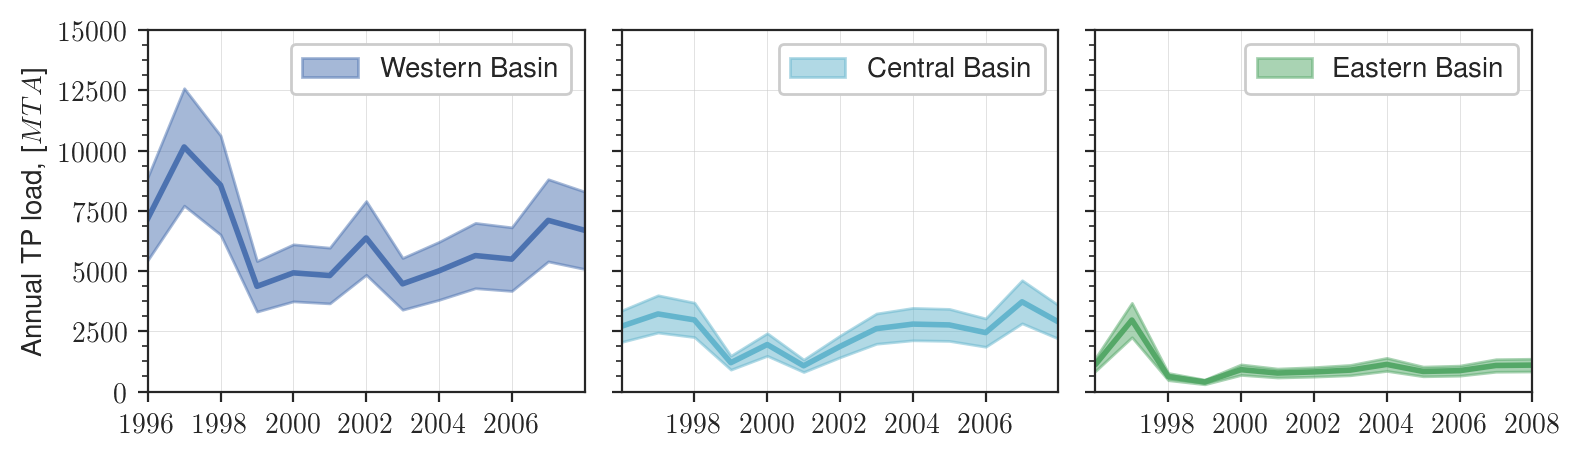

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(2*5*0.8,3*0.8), dpi=200)

ax1.plot(L.Year, L.WB+L['From Huron'], lw=2, )
ax1.fill_between(L.Year, (L.WB+L['From Huron'])*0.76, (L.WB+L['From Huron'])*1.24, alpha=0.5, lw=1, color=sns.color_palette()[0], label='Western Basin')

ax2.plot(L.Year, L.CB, lw=2,color=sns.color_palette()[9], label='')
ax2.fill_between(L.Year,(L.CB)*0.76, (L.CB)*1.24, alpha=0.5, lw=1, color=sns.color_palette()[9], label='Central Basin')

ax3.plot(L.Year, L.EB, lw=2,color=sns.color_palette()[2], label='')
ax3.fill_between(L.Year, (L.EB)*0.76, (L.EB)*1.24, alpha=0.5, lw=1, color=sns.color_palette()[2], label='Eastern Basin')


for ax in (ax1,ax2,ax3):
    ax.legend(frameon=1, loc=1,framealpha=1)
    ax.set_ylim(0,15000)
    ax.grid(lw=0.2)
    ax.set_xlim(1996, 2008)
    ax.set_xticks(np.linspace(1998, 2006, 9)[::2])
#     ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax1.set_xticks(np.linspace(1996, 2006, 11)[::2])
ax3.set_xticks(np.linspace(1998, 2008, 11)[::2])
ax1.set_ylabel('Annual TP load, [$MTA$]')
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax3.yaxis.set_major_formatter(plt.NullFormatter())
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/latex/img/LE_load_MinMax.pdf')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


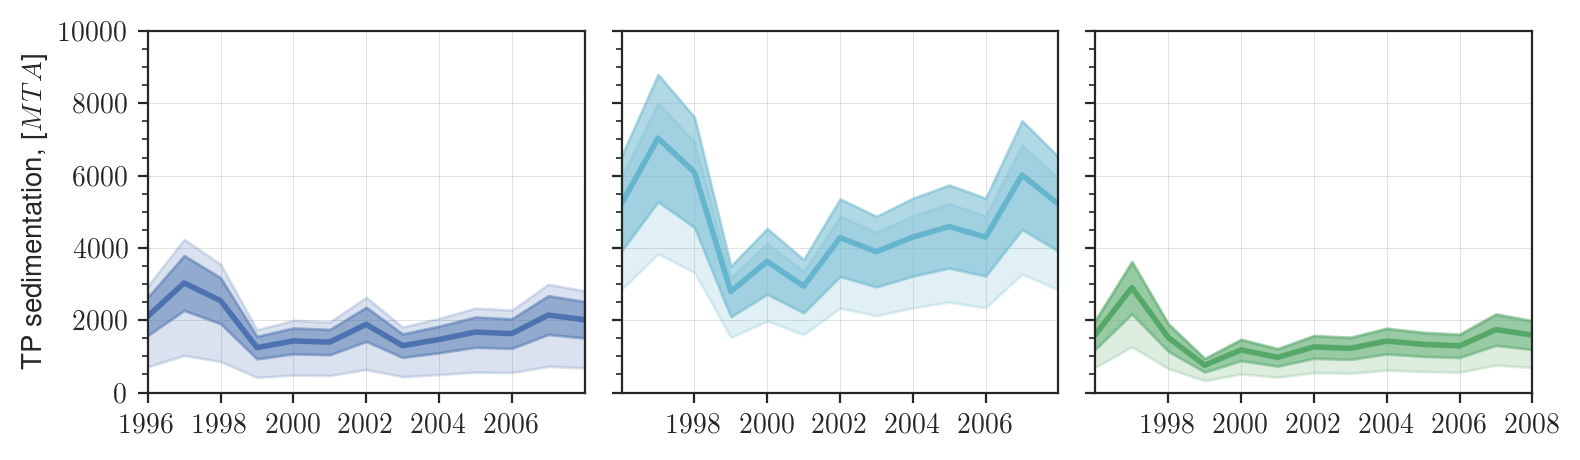

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(2*5*0.8,3*0.8), dpi=200)

ax1.plot(L.Year, S_WB, lw=2, )
ax1.fill_between(L.Year, S_WB_min, S_WB_max, alpha=0.5, lw=1, color=sns.color_palette()[0], label='Western Basin')
ax1.fill_between(L.Year, S_WB_sigma_min, S_WB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[0])

ax2.plot(L.Year, S_CB, lw=2,color=sns.color_palette()[9])
ax2.fill_between(L.Year, S_CB_min, S_CB_max, alpha=0.5, lw=1, color=sns.color_palette()[9], label='Central Basin')
ax2.fill_between(L.Year, S_CB_sigma_min, S_CB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[9])

ax3.plot(L.Year, S_EB, lw=2,color=sns.color_palette()[2])
ax3.fill_between(L.Year, S_EB_min, S_EB_max, alpha=0.5, lw=1, color=sns.color_palette()[2], label='Eastern Basin')
ax3.fill_between(L.Year, S_EB_sigma_min, S_EB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[2])


for ax in (ax1,ax2,ax3):
#     ax.legend(frameon=1, loc=1,framealpha=1)
    ax.set_ylim(0,10000)
    ax.grid(lw=0.2)
    ax.set_xlim(1996, 2008)
    ax.set_xticks(np.linspace(1998, 2006, 9)[::2])
#     ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax1.set_xticks(np.linspace(1996, 2006, 11)[::2])
ax3.set_xticks(np.linspace(1998, 2008, 11)[::2])
ax1.set_ylabel('TP sedimentation, [$MTA$]')
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax3.yaxis.set_major_formatter(plt.NullFormatter())
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/latex/img/LE_S_MinMax.pdf')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


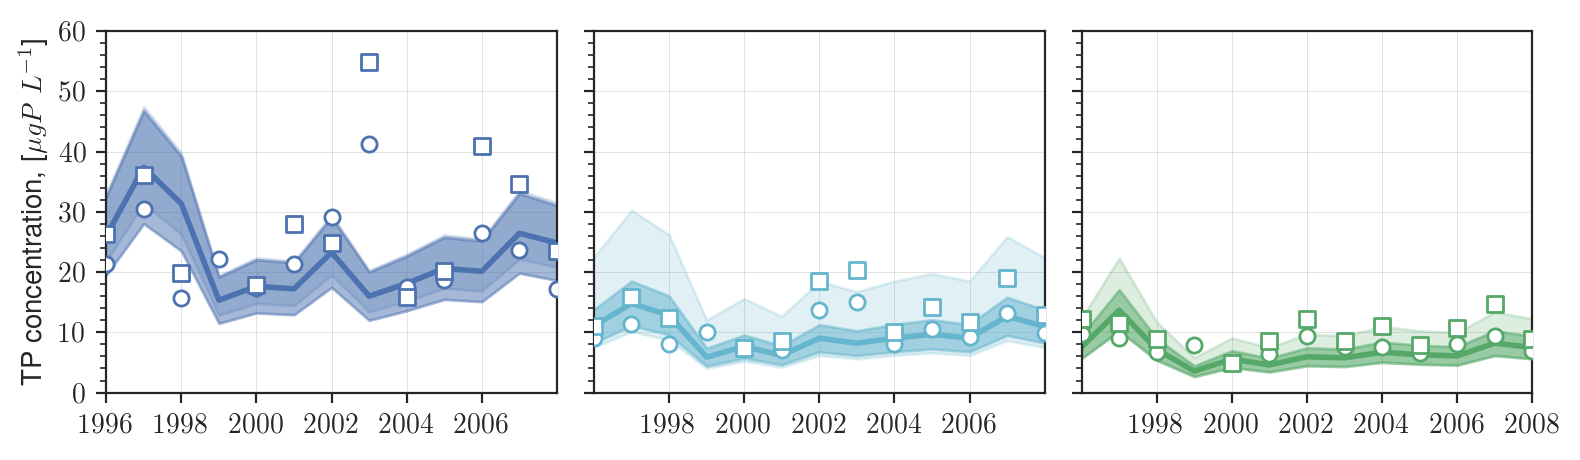

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(2*5*0.8,3*0.8), dpi=200)



ax1.plot(L.Year, TP_WB, lw=2, )
ax1.fill_between(L.Year, TP_WB_min, TP_WB_max, alpha=0.5, lw=1, color=sns.color_palette()[0], label='Western Basin')
ax1.fill_between(L.Year, TP_WB_sigma_min, TP_WB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[0])

ax2.plot(L.Year, TP_CB, lw=2,color=sns.color_palette()[9])
ax2.fill_between(L.Year, TP_CB_min, TP_CB_max, alpha=0.5, lw=1, color=sns.color_palette()[9], label='Central Basin')
ax2.fill_between(L.Year, TP_CB_sigma_min, TP_CB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[9])

ax3.plot(L.Year, TP_EB, lw=2,color=sns.color_palette()[2])
ax3.fill_between(L.Year, TP_EB_min, TP_EB_max, alpha=0.5, lw=1, color=sns.color_palette()[2], label='Eastern Basin')
ax3.fill_between(L.Year, TP_EB_min, TP_EB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[2])


ax1.scatter(TP.Year, TP.WB, s=30, edgecolor=sns.color_palette()[0], facecolor='w', zorder=10, label=None)
ax2.scatter(TP.Year, TP.CB, s=30, edgecolor=sns.color_palette()[9], facecolor='w', zorder=10, label=None)
ax3.scatter(TP.Year, TP.EB, s=30, edgecolor=sns.color_palette()[2], facecolor='w', zorder=10, label=None)

ax1.scatter(TP_a.Year, TP_a.WB, s=30, marker='s', edgecolor=sns.color_palette()[0], facecolor='w', zorder=10, label=None)
ax2.scatter(TP_a.Year, TP_a.CB, s=30, marker='s', edgecolor=sns.color_palette()[9], facecolor='w', zorder=10, label=None)
ax3.scatter(TP_a.Year, TP_a.EB, s=30, marker='s', edgecolor=sns.color_palette()[2], facecolor='w', zorder=10, label=None)

for ax in (ax1,ax2,ax3):
#     ax.legend(frameon=1, loc=1,framealpha=1)
    ax.set_ylim(0,60)
    ax.grid(lw=0.2)
    ax.set_xlim(1996, 2008)
    ax.set_xticks(np.linspace(1998, 2006, 9)[::2])
#     ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax1.set_xticks(np.linspace(1996, 2006, 11)[::2])
ax3.set_xticks(np.linspace(1998, 2008, 11)[::2])
ax1.set_ylabel('TP concentration, [$\mu gP$ $L^{-1}$]')
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax3.yaxis.set_major_formatter(plt.NullFormatter())
ax1.margins(x=0, y=1000)
plt.tight_layout()
# plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/latex/img/LE_TP_MinMax.pdf')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


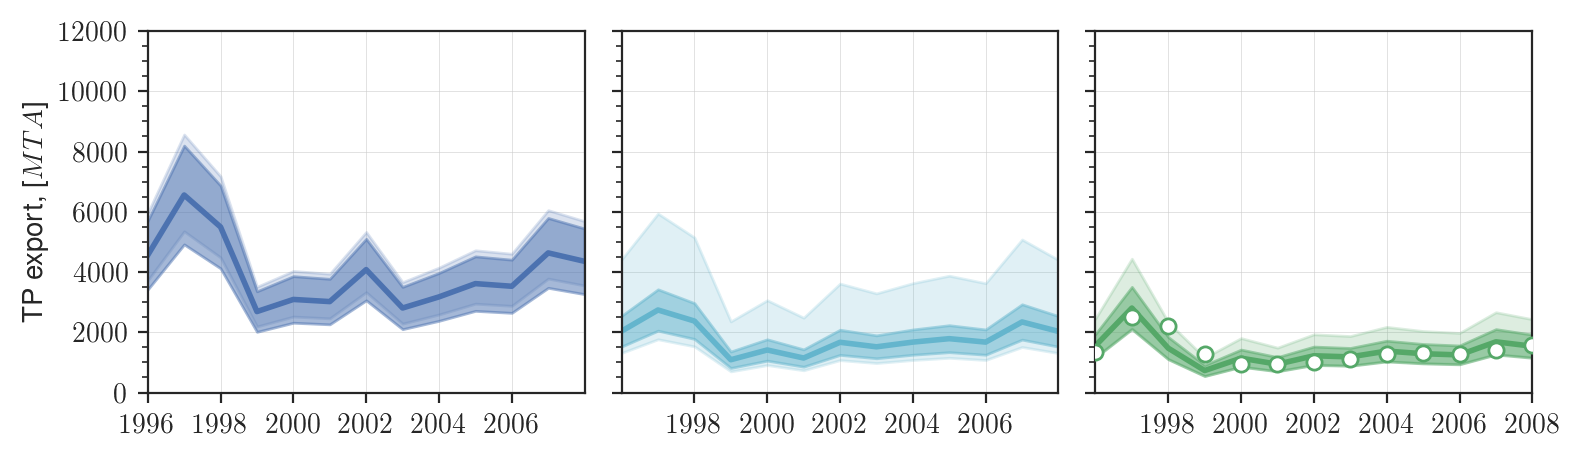

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(2*5*0.8,3*0.8), dpi=200)




ax1.plot(L.Year, E_WB, lw=2 )
ax1.fill_between(L.Year, E_WB_min, E_WB_max, alpha=0.5, lw=1, color=sns.color_palette()[0], label='Western Basin')
ax1.fill_between(L.Year, E_WB_sigma_min, E_WB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[0])

ax2.plot(L.Year, E_CB, lw=2,color=sns.color_palette()[9])
ax2.fill_between(L.Year, E_CB_min, E_CB_max, alpha=0.5, lw=1, color=sns.color_palette()[9], label='Central Basin')
ax2.fill_between(L.Year, E_CB_sigma_min, E_CB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[9])


ax3.plot(L.Year, E_EB, lw=2,color=sns.color_palette()[2])
ax3.fill_between(L.Year, E_EB_min, E_EB_max, alpha=0.5, lw=1, color=sns.color_palette()[2], label='Eastern Basin')
ax3.fill_between(L.Year, E_EB_sigma_min, E_EB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[2])


for ax in (ax1,ax2,ax3):
#     ax.legend(frameon=1, loc=1)
    ax.set_ylim(0,12000)
    ax.grid(lw=0.2)
    ax.set_xlim(1996, 2008)
#     ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xticks(np.linspace(1998, 2006, 9)[::2])
    ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax1.set_xticks(np.linspace(1996, 2006, 11)[::2])
ax3.set_xticks(np.linspace(1998, 2008, 11)[::2])
ax1.set_ylabel('TP export, [$MTA$]')
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax3.yaxis.set_major_formatter(plt.NullFormatter())
ax3.scatter(L.Year, L['Outflow Niagra'], s=30, edgecolor=sns.color_palette()[2], facecolor='w', label='Niagara River', zorder=10)
plt.tight_layout()
# plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/latex/img/LE_E_MinMax.pdf')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


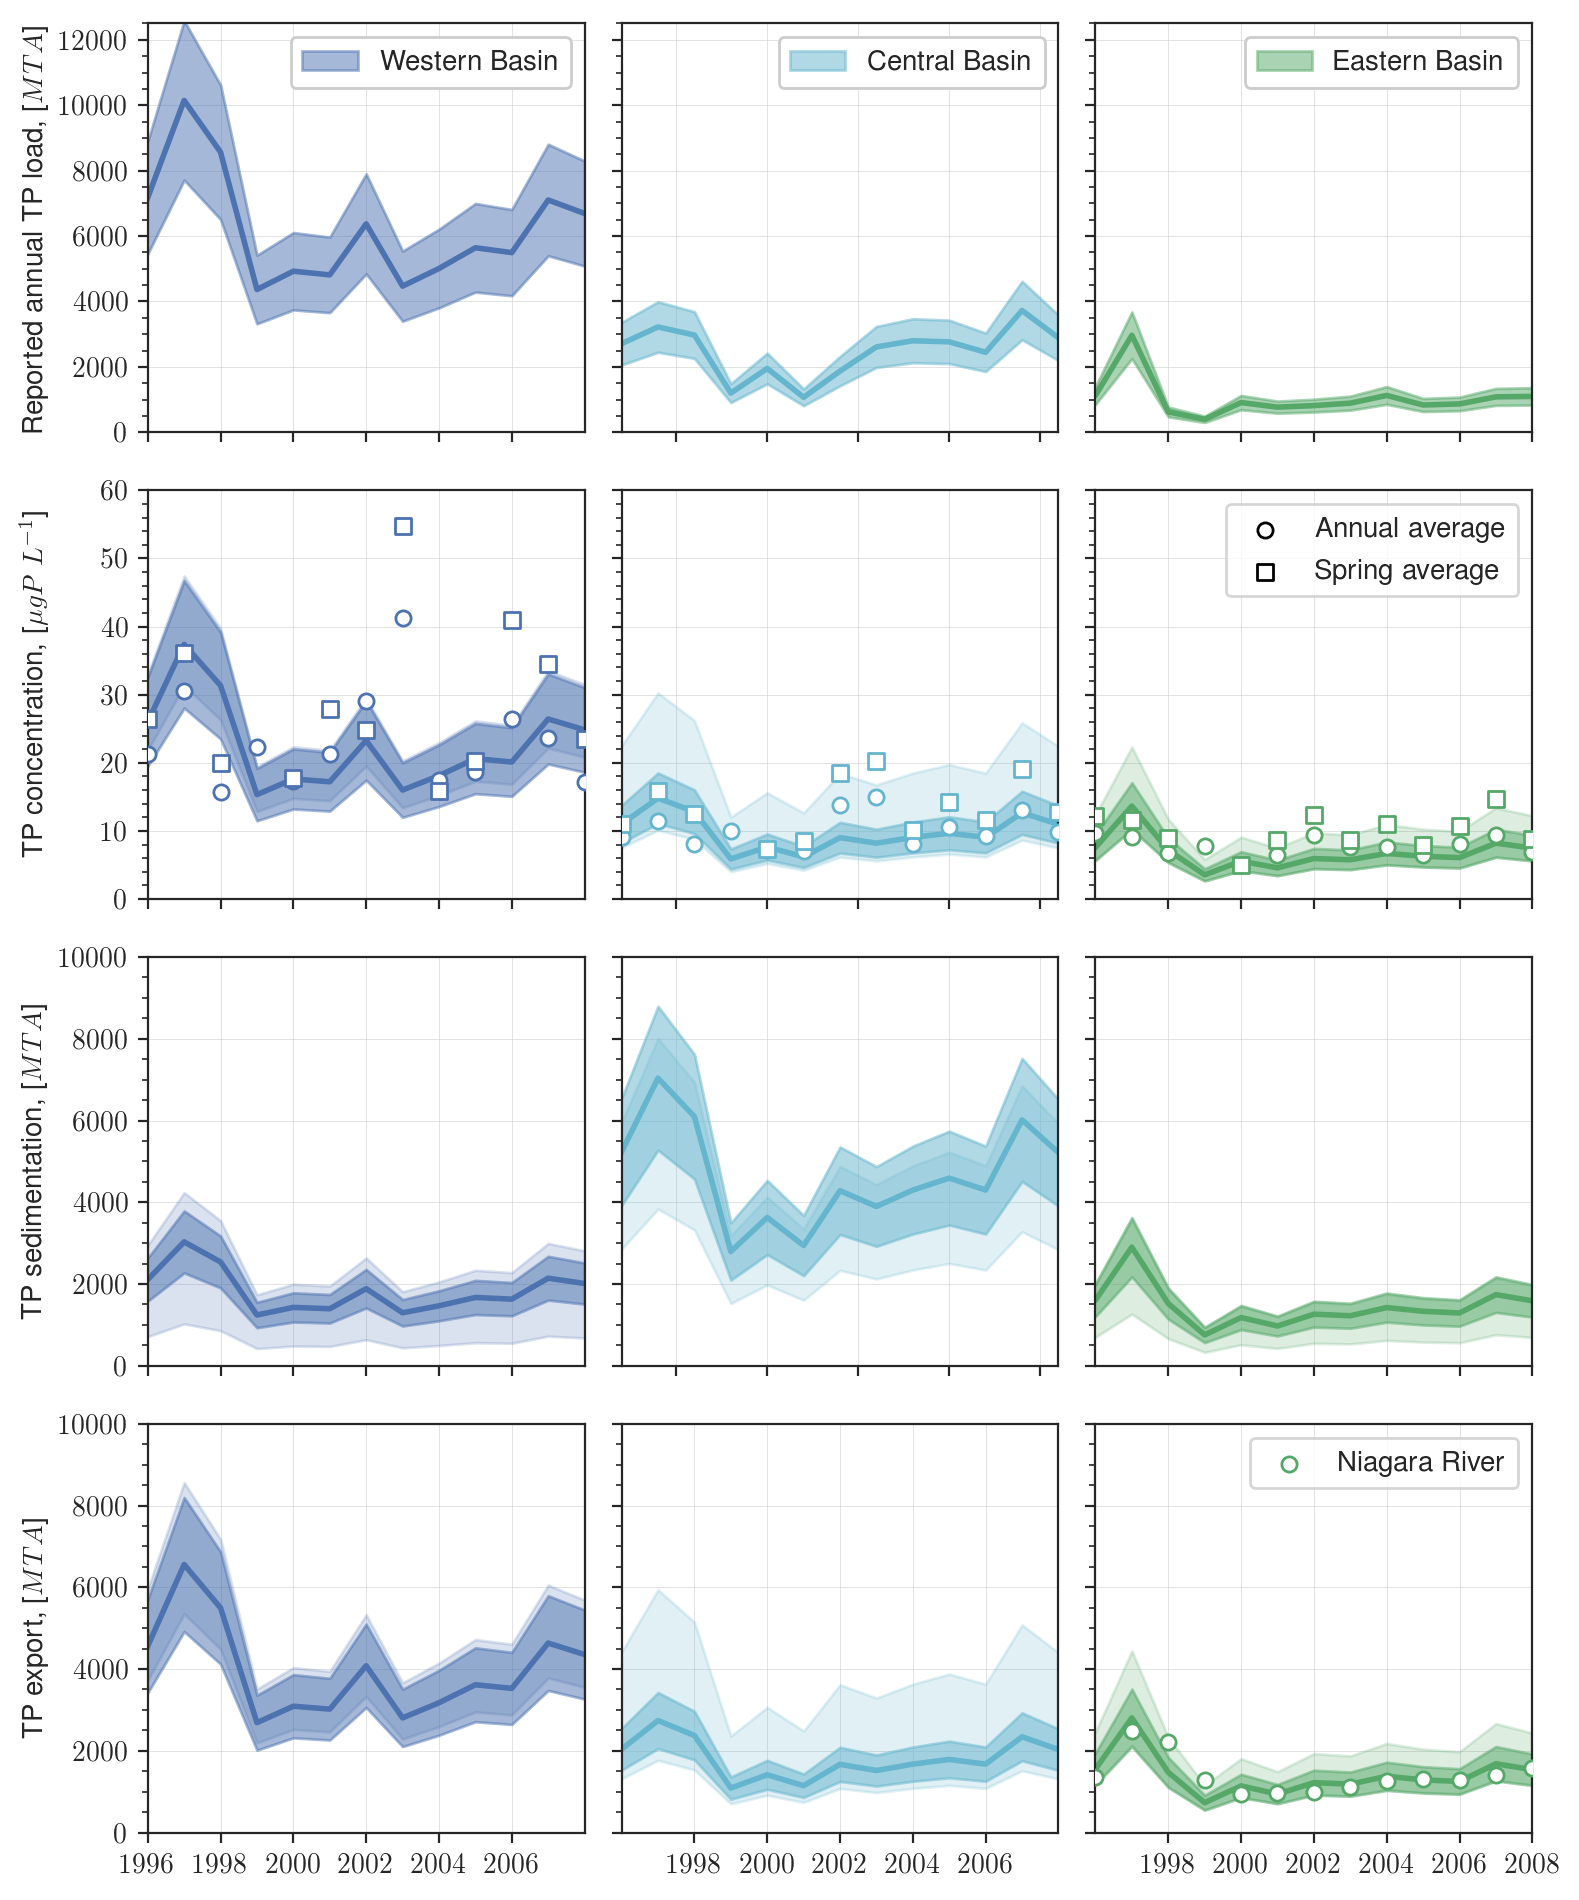

In [46]:
fig, ((ax1,ax2,ax3),(ax7,ax8,ax9),(ax4,ax5,ax6),(ax10,ax11,ax12)) = plt.subplots(4,3, figsize=(2*5*0.8,4*3*0.8), dpi=200)

ax1.plot(L.Year, L.WB+L['From Huron'], lw=2, )
ax1.fill_between(L.Year, (L.WB+L['From Huron'])*0.76, (L.WB+L['From Huron'])*1.24, alpha=0.5, lw=1, color=sns.color_palette()[0], label='Western Basin')

ax2.plot(L.Year, L.CB, lw=2,color=sns.color_palette()[9], label='')
ax2.fill_between(L.Year,(L.CB)*0.76, (L.CB)*1.24, alpha=0.5, lw=1, color=sns.color_palette()[9], label='Central Basin')

ax3.plot(L.Year, L.EB, lw=2,color=sns.color_palette()[2], label='')
ax3.fill_between(L.Year, (L.EB)*0.76, (L.EB)*1.24, alpha=0.5, lw=1, color=sns.color_palette()[2], label='Eastern Basin')


for ax in (ax1,ax2,ax3):
    ax.legend(frameon=1, loc=1,framealpha=1)
    ax.set_ylim(0,12500)
    ax.grid(lw=0.2)
    ax.set_xlim(1996, 2008)
#     ax.set_xticks(np.linspace(1998, 2006, 9)[::2])
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax1.set_xticks(np.linspace(1996, 2006, 11)[::2])
ax3.set_xticks(np.linspace(1998, 2008, 11)[::2])
ax1.set_ylabel('Reported annual TP load, [$MTA$]')
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax3.yaxis.set_major_formatter(plt.NullFormatter())
# plt.tight_layout()


ax1,ax2,ax3 = ax4,ax5,ax6

ax1.plot(L.Year, S_WB, lw=2, )
ax1.fill_between(L.Year, S_WB_min, S_WB_max, alpha=0.5, lw=1, color=sns.color_palette()[0], label='Western Basin')
ax1.fill_between(L.Year, S_WB_sigma_min, S_WB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[0])

ax2.plot(L.Year, S_CB, lw=2,color=sns.color_palette()[9])
ax2.fill_between(L.Year, S_CB_min, S_CB_max, alpha=0.5, lw=1, color=sns.color_palette()[9], label='Central Basin')
ax2.fill_between(L.Year, S_CB_sigma_min, S_CB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[9])

ax3.plot(L.Year, S_EB, lw=2,color=sns.color_palette()[2])
ax3.fill_between(L.Year, S_EB_min, S_EB_max, alpha=0.5, lw=1, color=sns.color_palette()[2], label='Eastern Basin')
ax3.fill_between(L.Year, S_EB_sigma_min, S_EB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[2])


for ax in (ax1,ax2,ax3):
#     ax.legend(frameon=1, loc=1,framealpha=1)
    ax.set_ylim(0,10000)
    ax.grid(lw=0.2)
    ax.set_xlim(1996, 2008)
#     ax.set_xticks(np.linspace(1998, 2006, 9)[::2])
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax1.set_xticks(np.linspace(1996, 2006, 11)[::2])
ax3.set_xticks(np.linspace(1998, 2008, 11)[::2])
ax1.set_ylabel('TP sedimentation, [$MTA$]')
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax3.yaxis.set_major_formatter(plt.NullFormatter())
plt.tight_layout()
# plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/latex/img/LE_S_MinMax.pdf')




ax1,ax2,ax3 = ax7,ax8,ax9

ax1.plot(L.Year, TP_WB, lw=2, )
ax1.fill_between(L.Year, TP_WB_min, TP_WB_max, alpha=0.5, lw=1, color=sns.color_palette()[0], label='Western Basin')
ax1.fill_between(L.Year, TP_WB_sigma_min, TP_WB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[0])

ax2.plot(L.Year, TP_CB, lw=2,color=sns.color_palette()[9])
ax2.fill_between(L.Year, TP_CB_min, TP_CB_max, alpha=0.5, lw=1, color=sns.color_palette()[9], label='Central Basin')
ax2.fill_between(L.Year, TP_CB_sigma_min, TP_CB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[9])

ax3.plot(L.Year, TP_EB, lw=2,color=sns.color_palette()[2])
ax3.fill_between(L.Year, TP_EB_min, TP_EB_max, alpha=0.5, lw=1, color=sns.color_palette()[2], label='Eastern Basin')
ax3.fill_between(L.Year, TP_EB_min, TP_EB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[2])


ax1.scatter(TP.Year, TP.WB, s=30, edgecolor=sns.color_palette()[0], facecolor='w', zorder=10, label=None)
ax2.scatter(TP.Year, TP.CB, s=30, edgecolor=sns.color_palette()[9], facecolor='w', zorder=10, label=None)
ax3.scatter(TP.Year, TP.EB, s=30, edgecolor=sns.color_palette()[2], facecolor='w', zorder=10, label=None)

ax1.scatter(TP_a.Year, TP_a.WB, s=30, marker='s', edgecolor=sns.color_palette()[0], facecolor='w', zorder=10, label=None)
ax2.scatter(TP_a.Year, TP_a.CB, s=30, marker='s', edgecolor=sns.color_palette()[9], facecolor='w', zorder=10, label=None)
ax3.scatter(TP_a.Year, TP_a.EB, s=30, marker='s', edgecolor=sns.color_palette()[2], facecolor='w', zorder=10, label=None)

from matplotlib.lines import Line2D
legend_elements = [ax3.scatter([0], [0], s=30, marker='o', edgecolor='k', facecolor='w', zorder=10, label='Annual average'),
                   ax3.scatter([0], [0], s=30, marker='s', edgecolor='k', facecolor='w', zorder=10, label='Spring average'),]

ax3.legend(handles=legend_elements, loc=1)

for ax in (ax1,ax2,ax3):
#     ax.legend(frameon=1, loc=1,framealpha=1)
    ax.set_ylim(0,60)
    ax.grid(lw=0.2)
    ax.set_xlim(1996, 2008)
#     ax.set_xticks(np.linspace(1998, 2006, 9)[::2])
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax1.set_xticks(np.linspace(1996, 2006, 11)[::2])
ax3.set_xticks(np.linspace(1998, 2008, 11)[::2])
ax1.text(-0.29,0.9,  'TP concentration, [$\mu gP$ $L^{-1}$]', transform=ax1.transAxes, rotation=90)
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax3.yaxis.set_major_formatter(plt.NullFormatter())
ax1.margins(x=0, y=1000)
plt.tight_layout()
# plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/latex/img/LE_TP_MinMax.pdf')


ax1,ax2,ax3 = ax10,ax11,ax12


ax1.plot(L.Year, E_WB, lw=2 )
ax1.fill_between(L.Year, E_WB_min, E_WB_max, alpha=0.5, lw=1, color=sns.color_palette()[0], label='Western Basin')
ax1.fill_between(L.Year, E_WB_sigma_min, E_WB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[0])

ax2.plot(L.Year, E_CB, lw=2,color=sns.color_palette()[9])
ax2.fill_between(L.Year, E_CB_min, E_CB_max, alpha=0.5, lw=1, color=sns.color_palette()[9], label='Central Basin')
ax2.fill_between(L.Year, E_CB_sigma_min, E_CB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[9])


ax3.plot(L.Year, E_EB, lw=2,color=sns.color_palette()[2])
ax3.fill_between(L.Year, E_EB_min, E_EB_max, alpha=0.5, lw=1, color=sns.color_palette()[2], label='Eastern Basin')
ax3.fill_between(L.Year, E_EB_sigma_min, E_EB_sigma_max, alpha=0.2, lw=1, color=sns.color_palette()[2])


for ax in (ax1,ax2,ax3):
#     ax.legend(frameon=1, loc=1)
    ax.set_ylim(0,10000)
    ax.grid(lw=0.2)
    ax.set_xlim(1996, 2008)
#     ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xticks(np.linspace(1998, 2006, 9)[::2])
    ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax1.set_xticks(np.linspace(1996, 2006, 11)[::2])
ax3.set_xticks(np.linspace(1998, 2008, 11)[::2])
ax1.set_ylabel('TP export, [$MTA$]')
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax3.yaxis.set_major_formatter(plt.NullFormatter())
h = ax3.scatter(L.Year, L['Outflow Niagra'], s=30, edgecolor=sns.color_palette()[2], facecolor='w', label='Niagara River', zorder=10)

ax3.legend(handles=[h], loc=1)

plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/latex/img/LE_MinMax.pdf')

# 